In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import statistics
import seaborn as sns 
from scipy import stats

In [3]:
import pandas as pd

data = pd.read_csv('Inc_Exp_Data.csv')
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [4]:
# Xem thông tin dữ liệu data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


## Phân phối

In [19]:
# Bảng thống kê tỉ lệ trình độ học vấn cao nhất
x = data.groupby('Highest_Qualified_Member')['Highest_Qualified_Member'].count()
x = pd.DataFrame(x)
x.columns = ['%']
Highest_Qualified_Member = x/sum(x['%'])*100
Highest_Qualified_Member

,%
Highest_Qualified_Member,
Graduate,38.0
Illiterate,10.0
Post-Graduate,12.0
Professional,20.0
Under-Graduate,20.0


<AxesSubplot:>

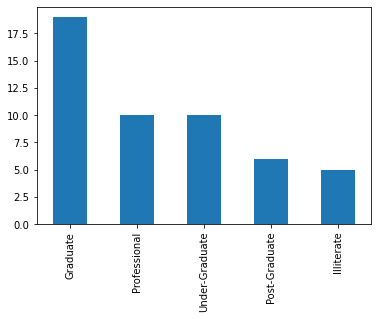

In [22]:
data['Highest_Qualified_Member'].value_counts().plot.bar()

<AxesSubplot:>

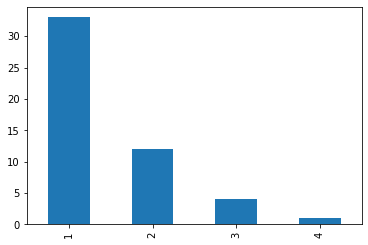

In [23]:
data['No_of_Earning_Members'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

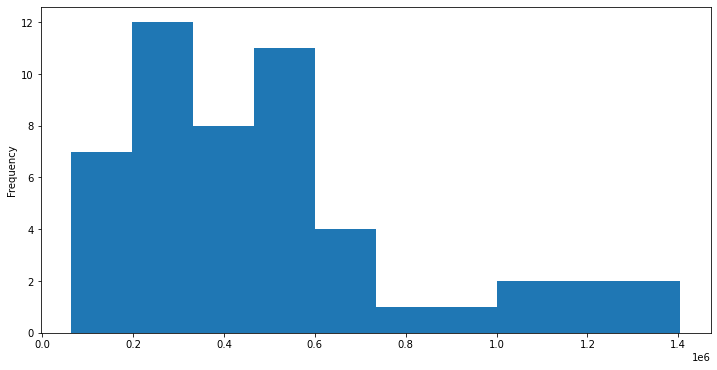

In [24]:
data['Annual_HH_Income'].plot.hist(figsize=(12,6))


## Xu hướng tập Trung

In [25]:
# Sử dụng hàm describe
data.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [26]:
# Tính trung bình các cột 
print("Giá trị trung bình của data:")
pd.DataFrame(data.mean())

Giá trị trung bình của data:


,0
Mthly_HH_Income,41558.00
Mthly_HH_Expense,18818.00
No_of_Fly_Members,4.06
Emi_or_Rent_Amt,3060.00
Annual_HH_Income,490019.04
No_of_Earning_Members,1.46


In [27]:
# Tính trung vị của các cột
print("Trung vị của data:")
pd.DataFrame(data.median())

Trung vị của data:


,0
Mthly_HH_Income,35000.0
Mthly_HH_Expense,15500.0
No_of_Fly_Members,4.0
Emi_or_Rent_Amt,0.0
Annual_HH_Income,447420.0
No_of_Earning_Members,1.0


In [28]:
# Tìm mode
print("Yếu vị của data:")
pd.DataFrame(data.mode(dropna = True))

Yếu vị của data:


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,45000,25000,4,0,590400,Graduate,1


## Sự phân tán

In [29]:
#tính min của từng cột

print('min của data:')
pd.DataFrame(data.min(skipna= True, numeric_only= True))

min của data:


,0
Mthly_HH_Income,5000
Mthly_HH_Expense,2000
No_of_Fly_Members,1
Emi_or_Rent_Amt,0
Annual_HH_Income,64200
No_of_Earning_Members,1


In [30]:
#tính max của từng cột

print('max của data:')
pd.DataFrame(data.max(skipna= True, numeric_only= True))

max của data:


,0
Mthly_HH_Income,100000
Mthly_HH_Expense,50000
No_of_Fly_Members,7
Emi_or_Rent_Amt,35000
Annual_HH_Income,1404000
No_of_Earning_Members,4


In [31]:
# Tính độ lệch chuẩn - standard deviation
print("Độ lệch chuẩn của data:")
pd.DataFrame(data.std(skipna = True))

Độ lệch chuẩn của data:


,0
Mthly_HH_Income,26097.908979
Mthly_HH_Expense,12090.216824
No_of_Fly_Members,1.517382
Emi_or_Rent_Amt,6241.434948
Annual_HH_Income,320135.792123
No_of_Earning_Members,0.734291


In [32]:
# Tính phương sai
print("Phương sai của data:")
pd.DataFrame(data.var(skipna = True))

Phương sai của data:


,0
Mthly_HH_Income,6.811009e+08
Mthly_HH_Expense,1.461733e+08
No_of_Fly_Members,2.302449e+00
Emi_or_Rent_Amt,3.895551e+07
Annual_HH_Income,1.024869e+11
No_of_Earning_Members,5.391837e-01


Text(0, 0.5, 'Count')

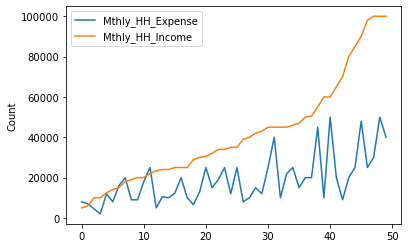

In [17]:
data[["Mthly_HH_Expense", "Mthly_HH_Income"]].plot()
plt.ylabel('Count')